In [1]:
import pandas as pd
import ipaddress
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from functions import *

In [2]:
# import data
data_file = 'ml_dataset_1.csv'
# data_file = 'ml_dataset_nooutlier_1.csv'
target_column = 'packet_interval'

data = pd.read_csv(data_file)

# Extract the feature matrix (X) and the target variable (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

print(X.shape)
print(y.shape)

(3914, 5)
(3914,)


In [3]:
# Polynomial Featuring
degree = 1
poly = PolynomialFeatures(degree = degree)
X_poly = poly.fit_transform(X)

print(X_poly.shape)

(3914, 6)


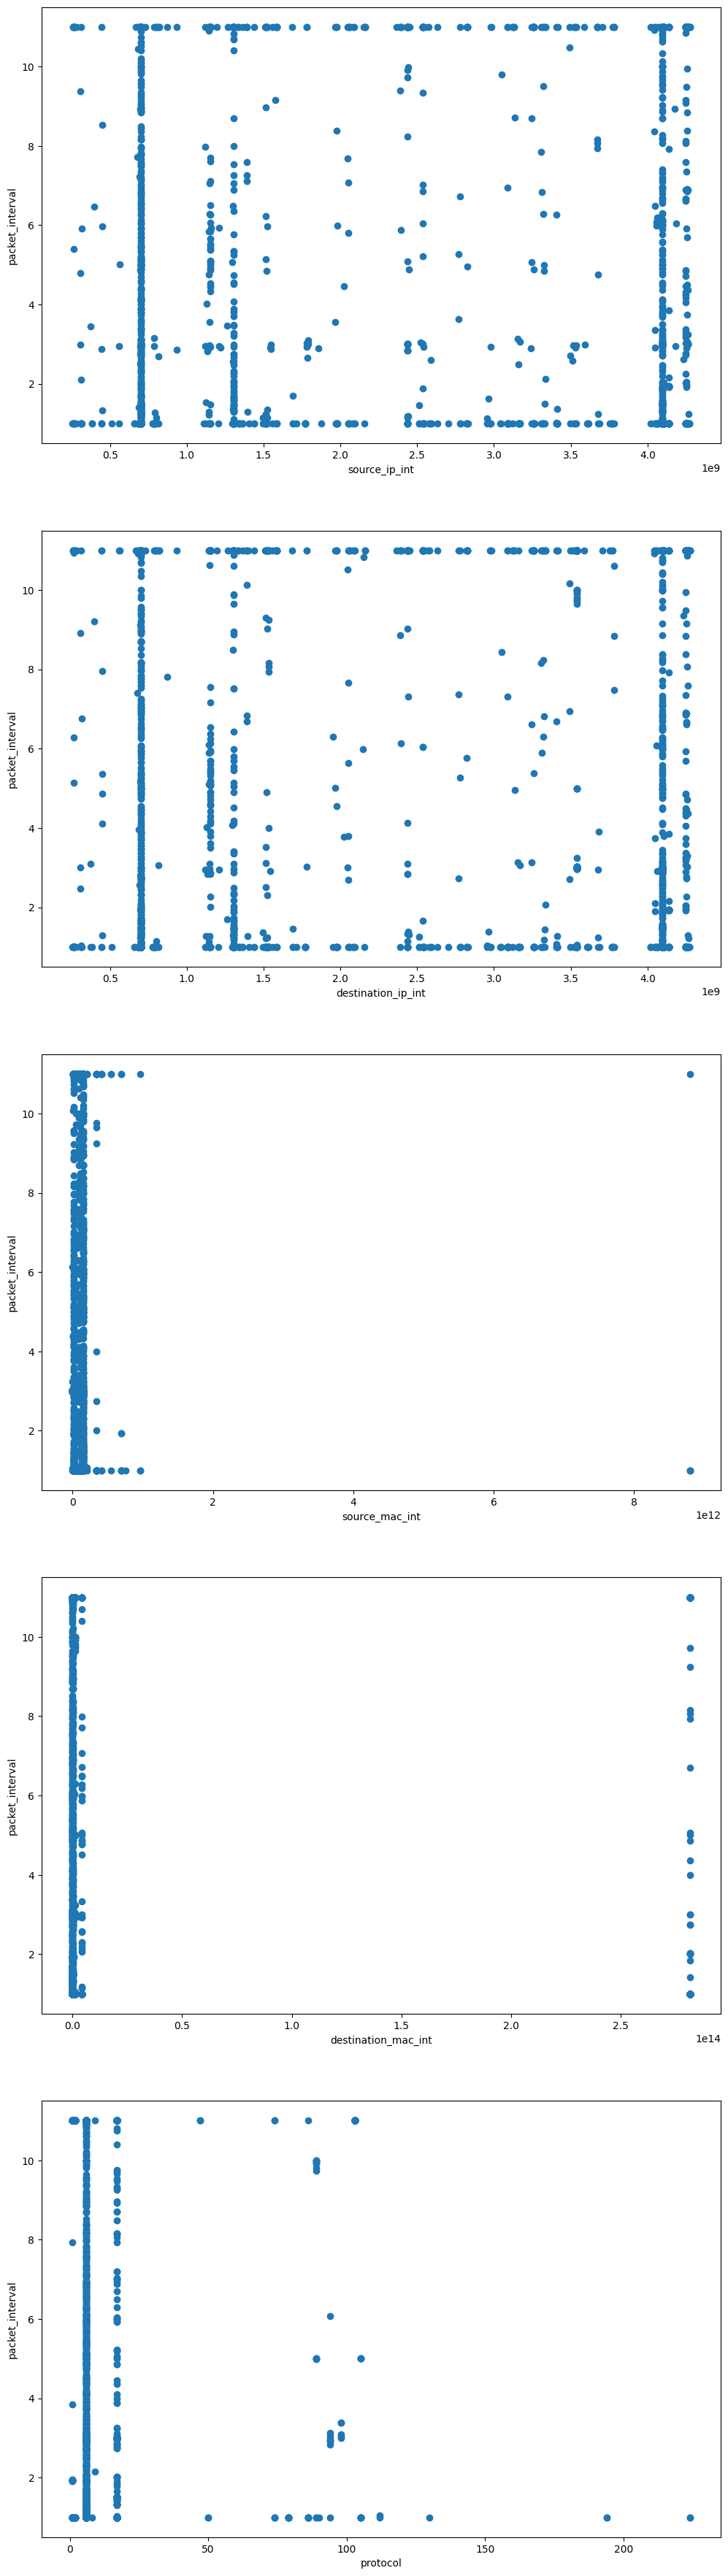

In [4]:
# Data visualization
fig, ax = plt.subplots(len(X.columns), figsize = (12, 45))

for i, column in enumerate(X):
    ax[i].set_xlabel(column)
    ax[i].set_ylabel(target_column)
#     ax[i].set_title(column + ' - Flow Duration')

    ax[i].scatter(X[column], y)

In [5]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [6]:
# Data Normalization
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test_normalized = scaler.transform(X_test)

<b>Hyperparameters of Linear Regression</b>

<p>copy_X: This hyperparameter determines whether a copy of the input data X should be made before fitting the model. By default, it is set to True, which means a copy is made. Setting it to False can save memory if you don't need to keep the original data.

fit_intercept: This hyperparameter controls whether an intercept term should be included in the linear regression model. When set to True (default), the model will estimate an intercept term. If set to False, the model will assume a zero intercept.

n_jobs: This hyperparameter specifies the number of CPU cores to be used during model fitting. By default, it is set to 1, meaning that only one core is used. Setting it to -1 will utilize all available cores for parallel processing, potentially speeding up the training process.

positive: This hyperparameter is relevant when you want to enforce positive coefficients in the linear regression model. When set to True, the model will restrict the coefficients to be positive. By default, it is set to False, allowing both positive and negative coefficients.</p>

In [7]:
# Finding best Hyperparameter values
param_grid = {'fit_intercept': [True, False], 'positive':[True, False]}
model = LinearRegression()

grid_search = GridSearchCV(model, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_fit_intercept = grid_search.best_params_['fit_intercept']
best_positive = grid_search.best_params_['positive']

# Create model with the best values of hyperparameters
model = LinearRegression(copy_X = True, fit_intercept = best_fit_intercept, n_jobs=1, positive = best_positive)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the values for test set 
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred, squared = False)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

cross_val_score(model, X_train, y_train, cv=10)

Mean Squared Error: 4.550910860527358
R2 Score: 0.0018113343426675588


array([ 0.02300936,  0.0238953 , -0.00389747, -0.02219458,  0.00304412,
        0.00175895, -0.00570688,  0.00919169, -0.01661609,  0.01360276])

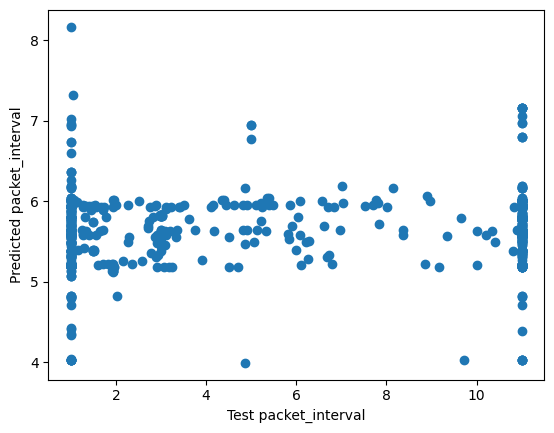

In [39]:
fig, ax = plt.subplots()
ax.set_xlabel('Test ' + target_column)
ax.set_ylabel('Predicted ' + target_column)
ax.scatter(y_test, y_pred)

In [33]:
packet_received = {
    'source_ip_int': ['41.177.26.25'],
    'destination_ip_int': ['15.71.149.99'],
    'source_mac_int': ['00:09:ba:24:40:1b'],
    'destination_mac_int': ['00:00:0c:07:ac:00'],
    'protocol': [6],
    }

# encode ip addresses
packet_received['source_ip_int'][0] = encode_ip(packet_received['source_ip_int'][0])
packet_received['destination_ip_int'][0] = encode_ip(packet_received['destination_ip_int'][0])

# encode mac addresses
packet_received['source_mac_int'][0] = encode_mac(packet_received['source_mac_int'][0])
packet_received['destination_mac_int'][0] = encode_mac(packet_received['destination_mac_int'][0])

# convert dictionary to dataframe
packet_data = pd.DataFrame.from_dict(packet_received)

packet_data_poly = poly.transform(packet_data)

# print(packet_data)
my_prediction = model.predict(packet_data_poly)
print(my_prediction)

[5.54063621]
